In [1]:
# Import para visualizar as pastas
import os
import sys

# Adiciona a pasta raiz do projeto ao path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from pathlib import Path

In [5]:
# import das bibliotecas utilizadas para exploração do dataframe
from src.data import load_custom_csv
import pandas as pd
import seaborn as sns
import numpy as np
from src.features import std_scaler_feature, minmax_scaler_feature, robust_scaler_feature

In [3]:
# Carregando o dataframe do data/processed/AEP_hourly_update.csv
df = load_custom_csv("AEP_hourly_update.csv")

In [4]:
# Transformando coluna Datetime em colunas anos, meses, dias, horas, dia da semana e é fim de semana
df_update = df.copy()
df_update['Datetime'] = pd.to_datetime(df_update['Datetime'])
df_update['year'] = df_update['Datetime'].dt.year
df_update['month'] = df_update['Datetime'].dt.month
df_update['day'] = df_update['Datetime'].dt.day
df_update['hour'] = df_update['Datetime'].dt.hour
df_update['dayofweek'] = df_update['Datetime'].dt.dayofweek
df_update['is_weekend'] = (df_update['Datetime'].dt.dayofweek >= 5).astype(int)

In [5]:
df_update.to_csv("../data/processed/AEP_ready.csv", index=False)

# Preprocessamento e validação AEP_ready.csv

In [3]:
# Carregando o dataframe do data/processed/AEP_ready.csv
df = load_custom_csv("AEP_ready.csv")

count    121273.000000
mean      15499.513717
std        2591.399065
min        9581.000000
25%       13630.000000
50%       15310.000000
75%       17200.000000
max       25695.000000
Name: AEP_MW, dtype: float64


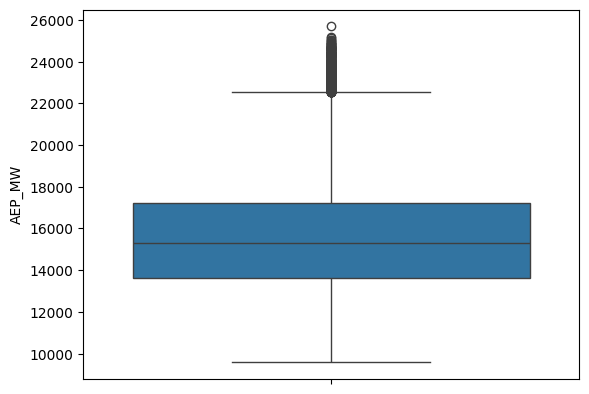

In [12]:
# Antes do pré processamento
ax = sns.boxplot(df['AEP_MW'])
print(df['AEP_MW'].describe())

In [7]:
y = df['AEP_MW']
y = np.log1p(y)

In [9]:
print(y.describe())

count    121273.000000
mean          9.634740
std           0.166821
min           9.167642
25%           9.520102
50%           9.636327
75%           9.752723
max          10.154091
Name: AEP_MW, dtype: float64


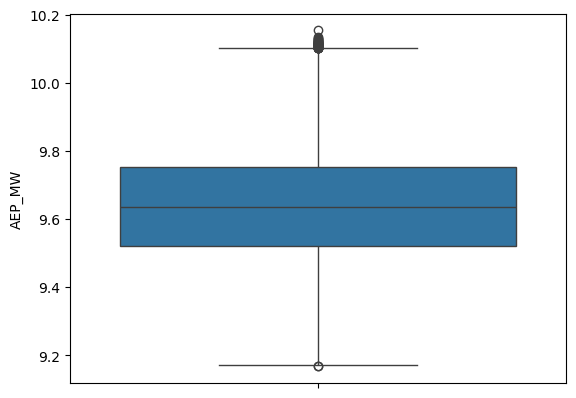

In [13]:
ax = sns.boxplot(y)